In [218]:
%run "../../PyUtils/common.ipynb"
import sklearn

<IPython.core.display.Javascript object>

In [219]:
df = LoadDataSet("./kimj.csv")
print(df)
df['previouspef'] = df.pefmax.shift(1)
df['previouspef2'] = df.pefmax.shift(2)
df['previouspef3'] = df.pefmax.shift(3)

     cname ampm timeofday dateofmeasure    pef1    pef2    pef3  pefmax indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax    pmax    tmin     amin   pmin  tmode    amode   pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  so2maxpoi  \
0     kimj 

In [220]:
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
datetime = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'datetime', datetime)
df.datetime = pd.to_datetime(df.datetime)

df.dropna(inplace=True)

df.sort_values(by='pefmax', ascending=True, inplace=True)
quantile=[]
for k in range(len(df.index)):
    nearestTenQuantile = floor((k/len(df.index))*10)*10
    if(nearestTenQuantile <=40):
        quantile.append(1)
    elif(nearestTenQuantile >=80):
        quantile.append(3)
    else:
        quantile.append(2)
        

quantileSeries = pd.Series(quantile)
print(len(quantileSeries))
print(len(df.index))
df["quantile"] = quantileSeries.values

print(df)

df.sort_values(by='datetime', ascending=True, inplace=True)

263
263
               datetime cname ampm timeofday dateofmeasure    pef1    pef2    pef3  pefmax indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax    pmax   tmin     amin   pmin  tmode    amode   pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime

In [221]:
#toDrop  = "cname, ampm, timeofday, dateofmeasure, so2, co, o3, no2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi, o3minpoi, o3mintimepoi, no2maxpoi, no2maxtimepoi, no2minpoi, no2mintimepoi, pm10maxpoi, pm10maxtimepoi, pm10minpoi, pm10mintimepoi".split(', ')
toDrop  = "cname, ampm, timeofday, dateofmeasure, so2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi, o3minpoi, o3mintimepoi, no2maxpoi, no2maxtimepoi, no2minpoi, no2mintimepoi, pm10maxpoi, pm10maxtimepoi, pm10minpoi, pm10mintimepoi, datetime, pefmax, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(toDrop, axis=1)
df=df.reset_index(drop=True)

In [222]:
print(df)

        co    o3   no2  previouspef  previouspef2  previouspef3  quantile
0   19.100 0.342 1.127       92.000        89.000        98.000         1
1   11.700 0.669 0.498      123.000        85.000       121.000         2
2    7.400 0.711 0.147      100.000        92.000        89.000         1
3   10.000 0.537 0.386      106.000       100.000        92.000         1
..     ...   ...   ...          ...           ...           ...       ...
259 12.600 0.601 0.821      154.000       113.000       118.000         2
260 13.000 0.776 0.851      124.000       154.000       113.000         1
261 14.500 0.829 0.673      110.000       107.000       124.000         3
262  8.200 0.669 0.386      121.000       123.000       155.000         1

[263 rows x 7 columns]


In [223]:
print(df.index.size)

263


        co    o3   no2  previouspef  previouspef2  previouspef3  quantile
0   19.100 0.342 1.127       92.000        89.000        98.000         1
1   11.700 0.669 0.498      123.000        85.000       121.000         2
2    7.400 0.711 0.147      100.000        92.000        89.000         1
3   10.000 0.537 0.386      106.000       100.000        92.000         1
..     ...   ...   ...          ...           ...           ...       ...
259 12.600 0.601 0.821      154.000       113.000       118.000         2
260 13.000 0.776 0.851      124.000       154.000       113.000         1
261 14.500 0.829 0.673      110.000       107.000       124.000         3
262  8.200 0.669 0.386      121.000       123.000       155.000         1

[263 rows x 7 columns]
Feature space holds 263 observations and 6 features
Unique target labels: [1 2 3]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.414449 
   DecisionTree Gini r^2 score: -1.035507
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.3536

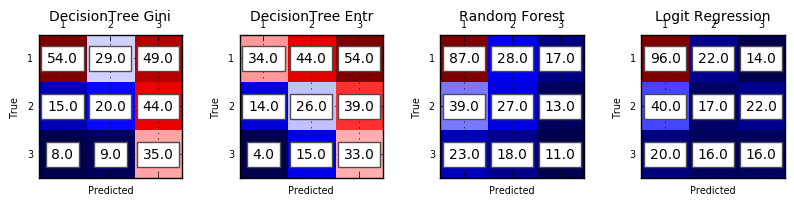

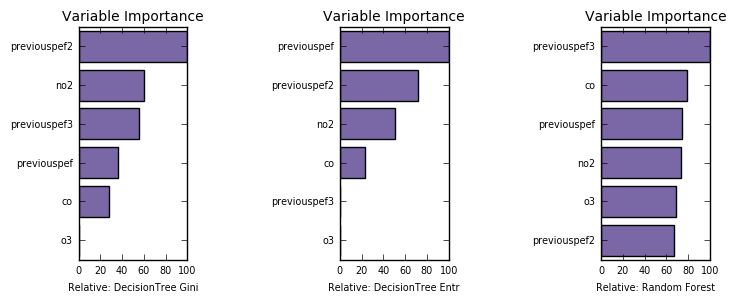

In [224]:
from sklearn.naive_bayes import GaussianNB
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini", class_weight='balanced'),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy", class_weight='balanced'), 
        #"SVM"               , sklearn.svm.SVC(), 
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        #"K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        #"Gradient Boosting" , sklearn.ensemble.GradientBoostingClassifier(subsample=.85),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(class_weight='balanced'),
        #"Naive Bayes"       , GaussianNB(),
];
predictColumn="quantile"
df.replace(to_replace="am", value=0, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="pm", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="G", value=0, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="R", value=2, inplace=True, limit=None, regex=False, method='pad', axis=1)
print(df)
y = df[predictColumn]
#y.drop(y.index[0],inplace=True)
X = df.drop(predictColumn, axis=1)
#X.drop(X.index[X.index.size-1],inplace=True)
(X1,y1,ra,cls, y_preds, clfs) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

In [137]:
#get_ipython().reset()
decisionTrees = []

for k in range( int (len(cls)/2)) :
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

d = DrawDecisionTree(X,y, decisionTrees, class_names);

NameError: name 'class_names' is not defined